# Supply Chain Delay Correlation Analysis - Phase 1 Implementation
This notebook implements Phase 1 of the three-technique correlation analysis using original dataset (as-is).

1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

2. Loading Dataset

In [ ]:
df = pd.read_csv('/content/dataset.csv')

3. Feature and Target Variable Definition

In [14]:
features = [
    'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'weather_condition_severity', 'port_congestion_level',
    'shipping_costs', 'supplier_reliability_score', 'lead_time_days',
    'historical_demand', 'iot_temperature', 'cargo_condition_status',
    'route_risk_level', 'customs_clearance_time', 'driver_behavior_score',
    'fatigue_monitoring_score'
]
targets = ['delay_probability', 'delivery_time_deviation', 'eta_variation_hours']

4. Pearson Correlation Computation

In [15]:
pearson_results = []

for target in targets:
    for feature in features:
        try:
            corr, _ = pearsonr(df[feature], df[target])
            pearson_results.append({
                'Target': target,
                'Feature': feature,
                'Pearson Correlation': corr
            })
        except Exception as e:
            pearson_results.append({
                'Target': target,
                'Feature': feature,
                'Pearson Correlation': None,
                'Error': str(e)
            })

# Convert to DataFrame
pearson_df = pd.DataFrame(pearson_results)

# Sort by absolute correlation value for each target
pearson_df['abs_corr'] = pearson_df['Pearson Correlation'].fillna(0).abs()
pearson_df = pearson_df.sort_values(by=['Target', 'abs_corr'], ascending=[True, False]).drop(columns='abs_corr')

# remove non sequential numbering
pearson_df = pearson_df.reset_index(drop=True)
# Show to user
display(pearson_df)

,Target,Feature,Pearson Correlation
0,delay_probability,port_congestion_level,0.008972
1,delay_probability,customs_clearance_time,0.004896
2,delay_probability,warehouse_inventory_level,0.004686
3,delay_probability,driver_behavior_score,-0.003919
4,delay_probability,traffic_congestion_level,-0.003790
5,delay_probability,route_risk_level,-0.003407
6,delay_probability,cargo_condition_status,0.002910
7,delay_probability,historical_demand,-0.002907
8,delay_probability,handling_equipment_availability,0.002690
9,delay_probability,supplier_reliability_score,0.001890


5. Pearson Correlation Heatmap Visualization

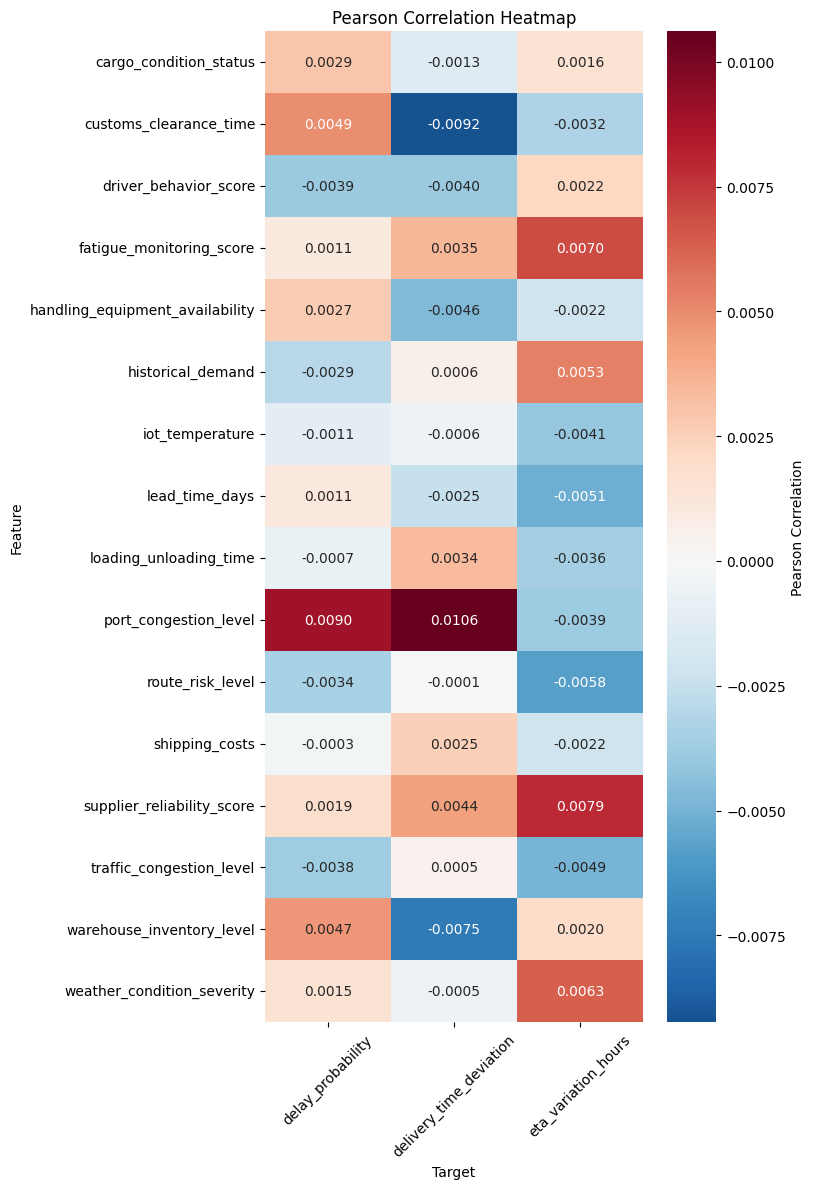

In [21]:
# Create Pearson heatmap
pivot_pearson = pearson_df.pivot(index='Feature', columns='Target', values='Pearson Correlation')

plt.figure(figsize=(8, 12))
sns.heatmap(pivot_pearson, annot=True, cmap='RdBu_r', center=0, fmt='.4f',
            cbar_kws={'label': 'Pearson Correlation'})
plt.title('Pearson Correlation Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Spearman Correlation Computation

In [17]:
# Calculate Spearman correlation and store results in DataFrame
spearman_results = []

for target in targets:
    for feature in features:
        try:
            corr, _ = spearmanr(df[feature], df[target])
            spearman_results.append({
                'Target': target,
                'Feature': feature,
                'Spearman Correlation': corr
            })
        except Exception as e:
            spearman_results.append({
                'Target': target,
                'Feature': feature,
                'Spearman Correlation': None,
                'Error': str(e)
            })

# Convert to DataFrame
spearman_df = pd.DataFrame(spearman_results)

# Sort by absolute correlation value for each target
spearman_df['abs_corr'] = spearman_df['Spearman Correlation'].fillna(0).abs()
spearman_df = spearman_df.sort_values(by=['Target', 'abs_corr'], ascending=[True, False]).drop(columns='abs_corr')

# remove non sequential numbering
spearman_df = spearman_df.reset_index(drop=True)
# Show to user
display(spearman_df)

,Target,Feature,Spearman Correlation
0,delay_probability,route_risk_level,-0.006897
1,delay_probability,port_congestion_level,0.006684
2,delay_probability,warehouse_inventory_level,0.006380
3,delay_probability,historical_demand,-0.005674
4,delay_probability,fatigue_monitoring_score,0.005217
5,delay_probability,driver_behavior_score,-0.004113
6,delay_probability,traffic_congestion_level,-0.003622
7,delay_probability,shipping_costs,-0.002559
8,delay_probability,customs_clearance_time,0.002380
9,delay_probability,weather_condition_severity,0.001217


7. Spearman Correlation Heatmap Visualization

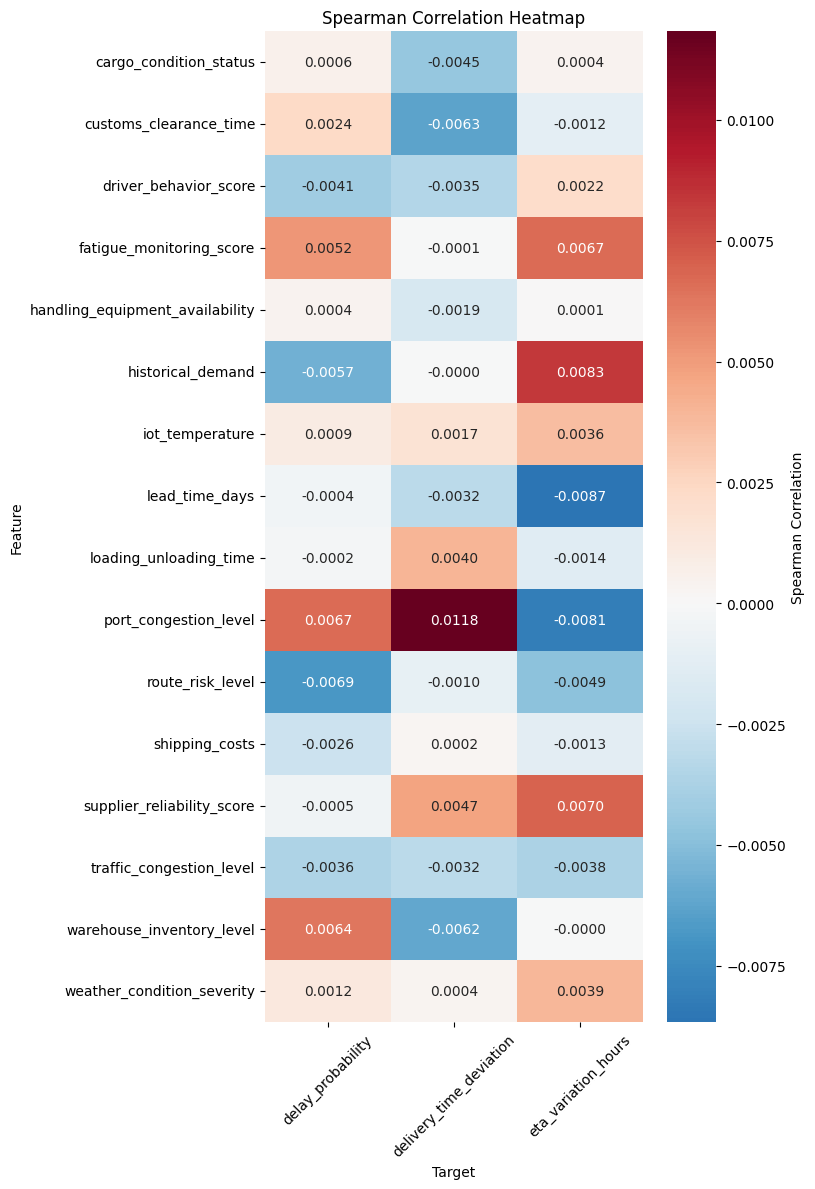

In [22]:
# Create Spearman heatmap
pivot_spearman = spearman_df.pivot(index='Feature', columns='Target', values='Spearman Correlation')

plt.figure(figsize=(8, 12))
sns.heatmap(pivot_spearman, annot=True, cmap='RdBu_r', center=0, fmt='.4f',
            cbar_kws={'label': 'Spearman Correlation'})
plt.title('Spearman Correlation Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Kendall Tau Correlation Computation

In [19]:
# Calculate Kendall Tau correlation and store results in DataFrame
kendall_results = []

for target in targets:
    for feature in features:
        try:
            corr, _ = kendalltau(df[feature], df[target])
            kendall_results.append({
                'Target': target,
                'Feature': feature,
                'Kendall Tau Correlation': corr
            })
        except Exception as e:
            kendall_results.append({
                'Target': target,
                'Feature': feature,
                'Kendall Tau Correlation': None,
                'Error': str(e)
            })

# Convert to DataFrame
kendall_df = pd.DataFrame(kendall_results)

# Sort by absolute correlation value for each target
kendall_df['abs_corr'] = kendall_df['Kendall Tau Correlation'].fillna(0).abs()
kendall_df = kendall_df.sort_values(by=['Target', 'abs_corr'], ascending=[True, False]).drop(columns='abs_corr')

# remove non sequential numbering
kendall_df = kendall_df.reset_index(drop=True)
# Show to user
display(kendall_df)

,Target,Feature,Kendall Tau Correlation
0,delay_probability,route_risk_level,-0.004594
1,delay_probability,port_congestion_level,0.004448
2,delay_probability,warehouse_inventory_level,0.004256
3,delay_probability,historical_demand,-0.003786
4,delay_probability,fatigue_monitoring_score,0.003475
5,delay_probability,driver_behavior_score,-0.002729
6,delay_probability,traffic_congestion_level,-0.002403
7,delay_probability,shipping_costs,-0.001691
8,delay_probability,customs_clearance_time,0.001602
9,delay_probability,weather_condition_severity,0.000798


9. Kendall Tau Correlation Heatmap Visualization

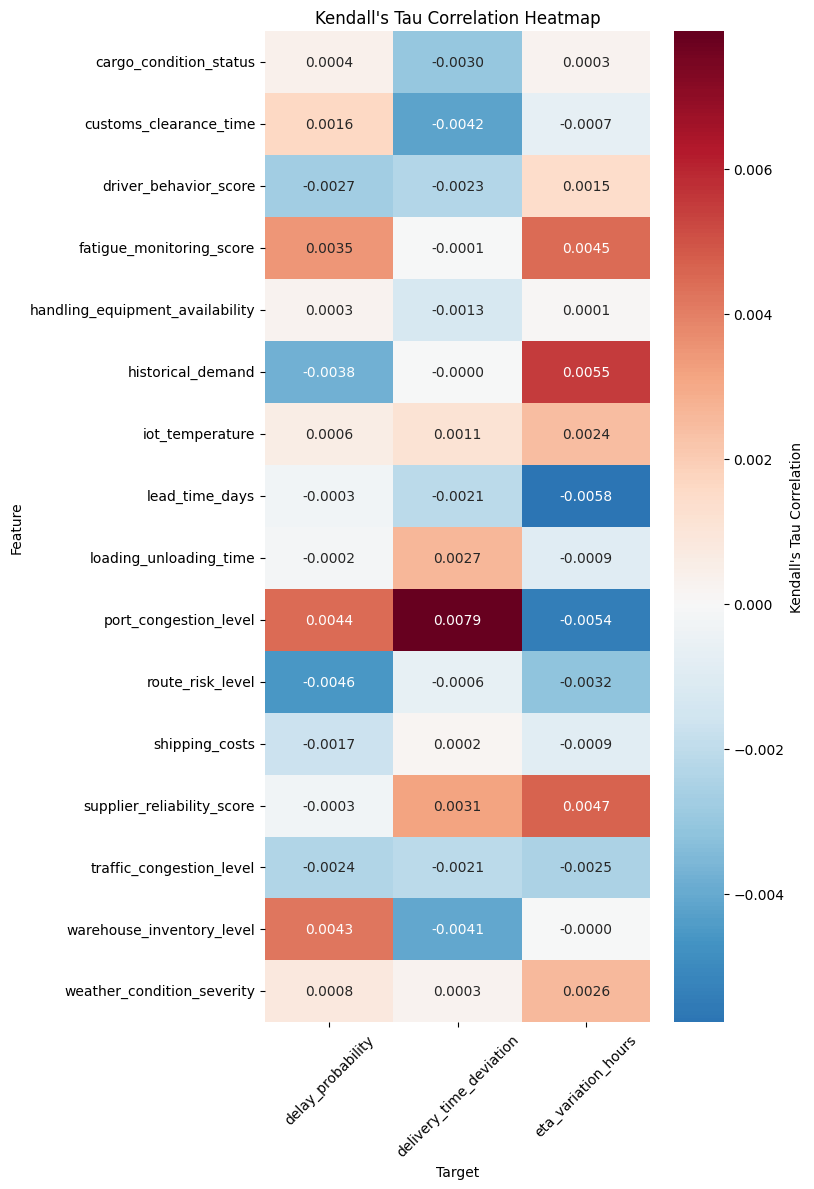

In [24]:
# Create Kendall heatmap
pivot_kendall = kendall_df.pivot(index='Feature', columns='Target', values='Kendall Tau Correlation')

plt.figure(figsize=(8, 12))
sns.heatmap(pivot_kendall, annot=True, cmap='RdBu_r', center=0, fmt='.4f',
            cbar_kws={'label': "Kendall's Tau Correlation"})
plt.title("Kendall's Tau Correlation Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

10. Correlation Methods Comparison


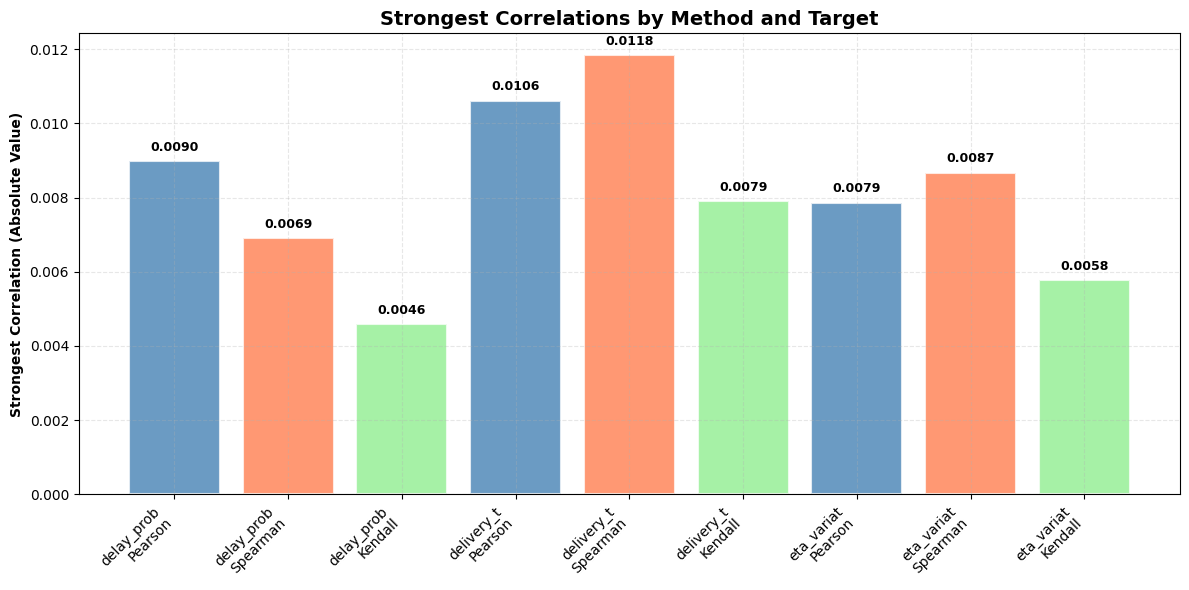


Top correlations:
DELAY_PROBABILITY: P:0.0090 | S:0.0069 | K:0.0046
DELIVERY_TIME_DEVIATION: P:0.0106 | S:0.0118 | K:0.0079
ETA_VARIATION_HOURS: P:0.0079 | S:0.0087 | K:0.0058


In [34]:
# bar chart comparison of strongest correlations
# Extract data using DataFrames instead of dictionary format
data = []

# Get strongest correlations from each DataFrame
for target in targets:
    # Get strongest Pearson correlation for this target
    pearson_strongest = pearson_df[pearson_df['Target'] == target].iloc[0]['Pearson Correlation']
    data.append((abs(pearson_strongest), f"{target[:10]}\nPearson"))

    # Get strongest Spearman correlation for this target
    spearman_strongest = spearman_df[spearman_df['Target'] == target].iloc[0]['Spearman Correlation']
    data.append((abs(spearman_strongest), f"{target[:10]}\nSpearman"))

    # Get strongest Kendall correlation for this target
    kendall_strongest = kendall_df[kendall_df['Target'] == target].iloc[0]['Kendall Tau Correlation']
    data.append((abs(kendall_strongest), f"{target[:10]}\nKendall"))

corrs, labels = zip(*data)
colors = ['steelblue', 'coral', 'lightgreen'] * len(targets)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(corrs)), corrs, color=colors, alpha=0.8,
               edgecolor='white', linewidth=1.5)

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylabel('Strongest Correlation (Absolute Value)', fontweight='bold')
plt.title('Strongest Correlations by Method and Target', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

# Add value labels
for bar, corr in zip(bars, corrs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0002,
             f'{corr:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# summary
print("\nTop correlations:")
for target in targets:
    p_corr = pearson_df[pearson_df['Target'] == target].iloc[0]['Pearson Correlation']
    s_corr = spearman_df[spearman_df['Target'] == target].iloc[0]['Spearman Correlation']
    k_corr = kendall_df[kendall_df['Target'] == target].iloc[0]['Kendall Tau Correlation']

    print(f"{target.upper()}: P:{abs(p_corr):.4f} | "
          f"S:{abs(s_corr):.4f} | "
          f"K:{abs(k_corr):.4f}")

11. Correlation of Interaction features with Target Variables

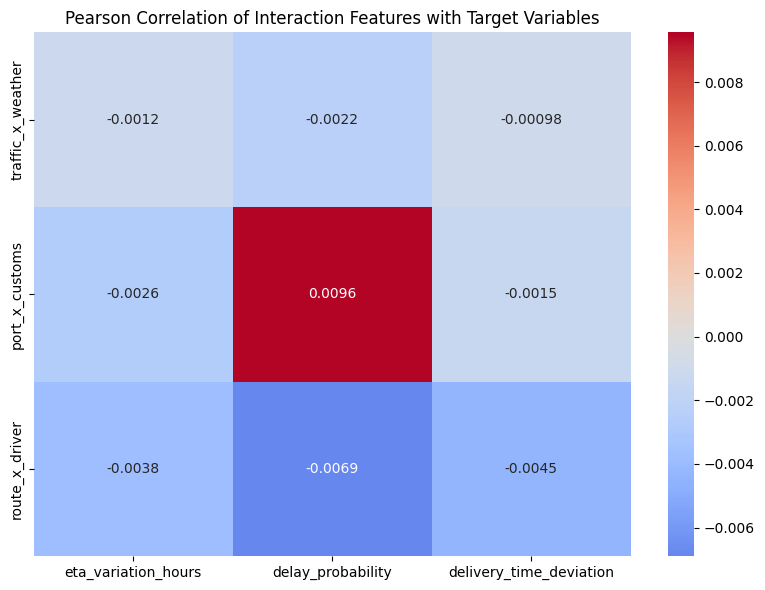

In [35]:
# Create interaction features
df['traffic_x_weather'] = df['traffic_congestion_level'] * df['weather_condition_severity']
df['port_x_customs'] = df['port_congestion_level'] * df['customs_clearance_time']
df['route_x_driver'] = df['route_risk_level'] * df['driver_behavior_score']

# Define features and targets
interaction_features = ['traffic_x_weather', 'port_x_customs', 'route_x_driver']
targets = ['eta_variation_hours', 'delay_probability', 'delivery_time_deviation']

# Combine into one DataFrame for correlation
corr_df = df[interaction_features + targets]

# Compute Pearson correlation matrix
correlation_matrix = corr_df.corr(method='pearson')

# Subset: correlation of interaction features vs. targets
correlation_subset = correlation_matrix.loc[interaction_features, targets]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation of Interaction Features with Target Variables')
plt.tight_layout()
plt.show()
